In [2]:
import numpy as np 
import pandas as pd 
import datetime
from datetime import datetime
from tqdm import tqdm_notebook as tqdm

from multiprocessing import Pool
from functools import partial
import Feature_function as func

In [3]:
data = pd.read_csv('D:\\庫存健診開發\\data\\processed\\TWSE_stock_processed.csv', converters={'ts': str, 'StockName': str, 'StockNo': str})
data['ts'] = pd.to_datetime(data['ts'])
data

,ts,StockNo,StockName,open,high,low,close,vol,total,capital,...,index_close,index_vol,industry_open,industry_high,industry_low,industry_close,industry_vol,foreign_buy,investment_buy,dealer_buy
0,2007-07-02,1101,台泥,16.68,16.68,16.15,16.37,10222.0,381140.0,1202.8,...,8939.49,5490199.0,125.08,125.09,122.87,124.56,44467.0,-3917.0,-765.0,158.0
1,2007-07-03,1101,台泥,16.46,16.50,16.18,16.33,9831.0,367582.0,1199.6,...,8996.20,6604477.0,124.69,125.49,123.77,124.54,76827.0,-1035.0,0.0,1255.0
2,2007-07-04,1101,台泥,16.37,16.77,16.31,16.46,11124.0,420368.0,1209.2,...,9068.98,7261940.0,124.83,127.13,124.56,125.13,48887.0,1057.0,680.0,198.0
3,2007-07-05,1101,台泥,16.46,16.59,16.15,16.15,15043.0,559331.0,1186.7,...,9148.78,7065444.0,125.46,125.46,122.82,123.23,55899.0,-8619.0,601.0,74.0
4,2007-07-06,1101,台泥,16.15,16.87,16.04,16.83,25514.0,959258.0,1236.5,...,9188.31,7514284.0,122.77,125.91,121.95,125.67,103863.0,5288.0,1485.0,1155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369242,2019-09-17,9958,世紀鋼,78.59,78.59,76.80,77.00,3050.0,237191.0,161.8,...,10874.50,4238581.0,102.59,102.71,101.54,101.55,31349.0,508.0,0.0,-358.0
2369243,2019-09-18,9958,世紀鋼,77.90,79.30,77.50,77.70,5940.0,464879.0,162.6,...,10929.45,4380466.0,101.42,102.19,101.42,101.80,33530.0,-291.0,0.0,144.0
2369244,2019-09-19,9958,世紀鋼,78.40,78.40,76.20,76.30,4011.0,308696.0,159.7,...,10894.70,4094710.0,101.80,102.03,101.31,101.59,22747.0,64.0,0.0,-161.0
2369245,2019-09-20,9958,世紀鋼,76.60,77.00,75.80,75.80,1742.0,132881.0,158.6,...,10929.69,4712806.0,101.46,102.10,101.33,102.10,55930.0,144.0,0.0,21.0


In [3]:
columns_dict = {'index': ['index_open', 'index_high', 'index_low', 'index_close', 'index_vol',
                           'industry_open', 'industry_high', 'industry_low', 'industry_close',
                           'industry_vol'],
               'price': ['open', 'high', 'low', 'close'],
               'vol': ['vol', 'total', 'VWAP'],
               'corr': ['index_close', 'industry_close', 'foreign_buy', 'investment_buy', 'dealer_buy'],
               'moment': ['close', 'index_close', 'industry_close', 'foreign_buy', 'investment_buy', 'dealer_buy']}

In [4]:
df_list = [group[1] for group in data.groupby(data['StockNo'])]

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.get_technical_indicators, columns_dict=columns_dict), df_list), total=len(df_list)), 1):
            output_list.append(x)
                
df = pd.concat(output_list, axis=0)
df

,ts,StockNo,StockName,open,high,low,close,vol,total,capital,...,investment_buy_kurtosis,dealer_buy_skew,dealer_buy_kurtosis,pvt_current,pvt,TR,ATR,RSI_15,SO5,SO3
0,2007-07-02,1103,嘉泥,16.690909,17.075348,16.389434,16.696833,8922.148890,241197.752334,163.0,...,NaN,NaN,NaN,NaN,NaN,0.685913,0.685913,0.000000,0.000000,0.000000
1,2007-07-03,1103,嘉泥,16.792673,17.181600,16.483122,16.793699,9528.445464,252811.658292,161.7,...,NaN,NaN,NaN,55.278694,NaN,0.698478,0.692614,0.000000,0.000000,0.000000
2,2007-07-04,1103,嘉泥,16.895752,17.289264,16.578034,16.891876,11023.590605,286518.072056,160.7,...,NaN,NaN,NaN,64.444429,119.723123,0.711230,0.699664,0.000000,0.000000,0.000000
3,2007-07-05,1103,嘉泥,16.999760,17.397944,16.673817,16.991004,12925.887006,327957.933786,163.7,...,NaN,NaN,NaN,75.854092,140.298521,0.724127,0.707054,0.000000,0.000000,0.000000
4,2007-07-06,1103,嘉泥,17.109628,17.512718,16.774992,17.095685,22855.487064,576534.951942,175.2,...,NaN,NaN,NaN,140.811720,216.665812,0.737727,0.714925,0.000000,0.628737,0.324509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,2019-09-17,9955,佳龍,19.540854,19.684652,19.311951,19.442533,809.447597,15833.513865,19.9,...,-3.0,-4.129483,15.052632,-6.151946,-13.724452,0.372701,0.503662,0.060364,0.119488,0.113594
2880,2019-09-18,9955,佳龍,19.327445,19.472854,19.141697,19.287597,362.143798,6863.474058,19.8,...,-3.0,-4.129483,15.052632,-2.885898,-9.037843,0.331157,0.482099,0.049477,0.134196,0.123895
2881,2019-09-19,9955,佳龍,19.170038,19.316798,19.013120,19.169869,840.337000,15650.591246,19.4,...,-3.0,-4.129483,15.052632,-5.129252,-8.015149,0.303678,0.459797,0.042812,0.150675,0.137285
2882,2019-09-20,9955,佳龍,19.072044,19.220740,18.930397,19.093576,434.980049,8042.232935,19.8,...,-3.0,-4.129483,15.052632,-1.731143,-6.860395,0.290343,0.438615,0.038954,0.171759,0.154522


In [5]:
df.columns

Index(['ts', 'StockNo', 'StockName', 'open', 'high', 'low', 'close', 'vol',
       'total', 'capital', 'VWAP', 'eliminate', 'year', 'industry',
       'index_open', 'index_high', 'index_low', 'index_close', 'index_vol',
       'industry_open', 'industry_high', 'industry_low', 'industry_close',
       'industry_vol', 'foreign_buy', 'investment_buy', 'dealer_buy',
       'origin_close', 'ma7', 'ma21', 'ema26', 'ema12', 'MACD', 'upper_band',
       'lower_band', 'index_close_corr', 'industry_close_corr',
       'foreign_buy_corr', 'investment_buy_corr', 'dealer_buy_corr',
       'close_skew', 'close_kurtosis', 'index_close_skew',
       'index_close_kurtosis', 'industry_close_skew',
       'industry_close_kurtosis', 'foreign_buy_skew', 'foreign_buy_kurtosis',
       'investment_buy_skew', 'investment_buy_kurtosis', 'dealer_buy_skew',
       'dealer_buy_kurtosis', 'pvt_current', 'pvt', 'TR', 'ATR', 'RSI_15',
       'SO5', 'SO3'],
      dtype='object')

In [7]:
df.to_csv('D:\\庫存健診開發\\data\\processed\\TWSE_Stock_feature.csv', index=False)

In [4]:
df = pd.read_csv('D:\\庫存健診開發\\data\\processed\\TWSE_Stock_feature.csv', converters={'StockNo': str})
df['ts'] = pd.to_datetime(df['ts'])
df

,ts,StockNo,StockName,open,high,low,close,vol,total,capital,...,investment_buy_kurtosis,dealer_buy_skew,dealer_buy_kurtosis,pvt_current,pvt,TR,ATR,RSI_15,SO5,SO3
0,2007-07-02,1103,嘉泥,16.690909,17.075348,16.389434,16.696833,8922.148890,241197.752334,163.0,...,NaN,NaN,NaN,NaN,NaN,0.685913,0.685913,0.000000,0.000000,0.000000
1,2007-07-03,1103,嘉泥,16.792673,17.181600,16.483122,16.793699,9528.445464,252811.658292,161.7,...,NaN,NaN,NaN,55.278694,NaN,0.698478,0.692614,0.000000,0.000000,0.000000
2,2007-07-04,1103,嘉泥,16.895752,17.289264,16.578034,16.891876,11023.590605,286518.072056,160.7,...,NaN,NaN,NaN,64.444429,119.723123,0.711230,0.699664,0.000000,0.000000,0.000000
3,2007-07-05,1103,嘉泥,16.999760,17.397944,16.673817,16.991004,12925.887006,327957.933786,163.7,...,NaN,NaN,NaN,75.854092,140.298521,0.724127,0.707054,0.000000,0.000000,0.000000
4,2007-07-06,1103,嘉泥,17.109628,17.512718,16.774992,17.095685,22855.487064,576534.951942,175.2,...,NaN,NaN,NaN,140.811720,216.665812,0.737727,0.714925,0.000000,0.628737,0.324509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369242,2019-09-17,9955,佳龍,19.540854,19.684652,19.311951,19.442533,809.447597,15833.513865,19.9,...,-3.0,-4.129483,15.052632,-6.151946,-13.724452,0.372701,0.503662,0.060364,0.119488,0.113594
2369243,2019-09-18,9955,佳龍,19.327445,19.472854,19.141697,19.287597,362.143798,6863.474058,19.8,...,-3.0,-4.129483,15.052632,-2.885898,-9.037843,0.331157,0.482099,0.049477,0.134196,0.123895
2369244,2019-09-19,9955,佳龍,19.170038,19.316798,19.013120,19.169869,840.337000,15650.591246,19.4,...,-3.0,-4.129483,15.052632,-5.129252,-8.015149,0.303678,0.459797,0.042812,0.150675,0.137285
2369245,2019-09-20,9955,佳龍,19.072044,19.220740,18.930397,19.093576,434.980049,8042.232935,19.8,...,-3.0,-4.129483,15.052632,-1.731143,-6.860395,0.290343,0.438615,0.038954,0.171759,0.154522


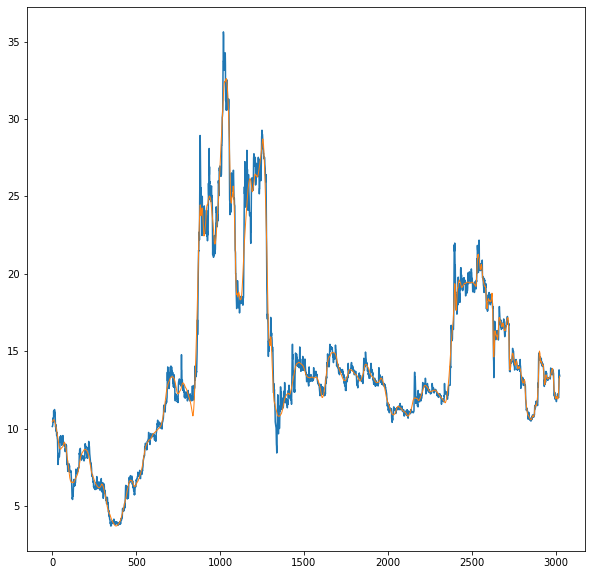

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(data[data.StockNo == '1316']['close'].reset_index(drop=True))
plt.plot(df[df.StockNo == '1316']['close'].reset_index(drop=True), linewidth=1)

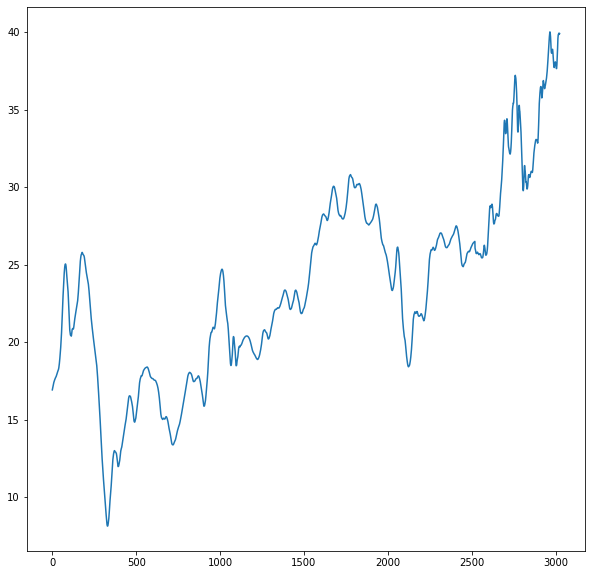

In [30]:
plt.figure(figsize=(10,10))
plt.plot(df[df.StockNo == '1101']['close'].reset_index(drop=True))


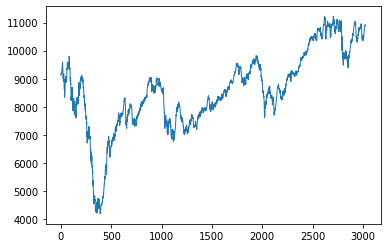

In [31]:
plt.plot(df[df.StockNo == '1101']['index_close'].reset_index(drop=True), linewidth=1)

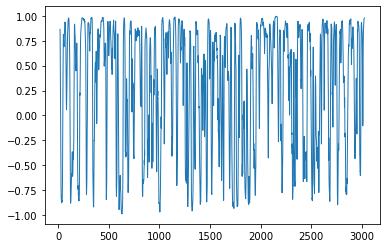